In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

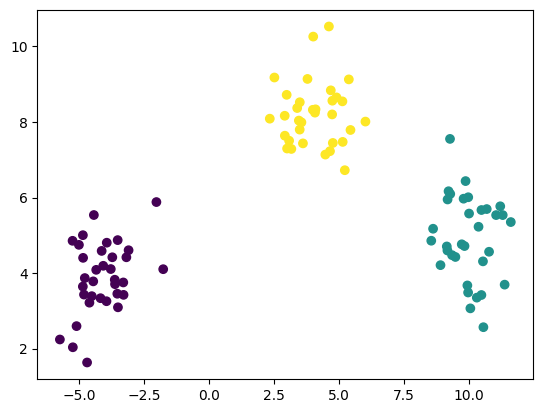

In [2]:
X,y = make_blobs()
plt.scatter(X[:,0], X[:,1],c=y);

## K-Means Clustering Algorithm

#### 1. Initialization
Randomly select k initial centroids from your dataset. These centroids will serve as the starting points for your clusters. The random selection ensures that the algorithm explores different starting positions, which can lead to better clustering results.

In [3]:
def init_centroids(X: np.array, k: int) -> np.array:
    "Randomly select k points which will represent the k centroids."
    indices = np.random.choice(X.shape[0],size=k,replace=False)
    return X[indices]

k = 3
C = init_centroids(X,k)

#### 2. Assignment
For each data point, you need to calculate the distance to each centroid. Typically, the Euclidean distance is used, but other distance metrics can also be applied.<br>
Once you have the distances, assign the data point to the cluster of the nearest centroid. This step ensures that each point is grouped with the closest centroid, forming clusters around these centroids.

In [4]:
# compute euclidean distances 
distances = np.linalg.norm(X[:,None]-C,axis=2)

nearest_c = np.argmin(distances,axis=1)

#### 3. Update
After assigning all the data points, update each centroid to be the mean of the points assigned to it. This means you calculate the average position of all points in a cluster and move the centroid to this new position. This step refines the cluster centers.

In [5]:
old_centroids = np.copy(C)

# if no points for 1 centroid, keep centroid the same as before
centroids = np.array([
    np.mean(X[nearest_c==i],axis=0)if len(X[nearest_c==i])>0 else C[i]
    for i in range(len(C))
])

#### 4. Iteration
Repeat the assignment and update steps. In each iteration, the centroids move based on the mean positions of the points in their clusters, and points are reassigned to the nearest centroid.<br>
The algorithm iterates until the centroids no longer move significantly between iterations. This indicates that the clusters have stabilized and the algorithm has converged.

In [14]:
def k_means(X,k,max_iter,n_init=1):

    min_dist = np.inf
    best_clustering = None

    for _ in range(n_init):

        for _ in range(max_iter):
            # initialize centroids
            C = init_centroids(X,k)

            # compute current distances
            distances = np.linalg.norm(X[:,None]-C,axis=2)
            
            # assign each point to nearest cluster & compute total dist
            nearest_c = np.argmin(distances,axis=1)
            total_dist = np.sum(np.min(distances,axis=1))

            old_C = np.copy(C)

            # update centroids
            C = np.array([
                np.mean(X[nearest_c==i],axis=0)if len(X[nearest_c==i])>0 else C[i]
                for i in range(len(C))
            ])
            
            if np.linalg.norm(C-old_C) < pow(10,-8):
                break

        if total_dist < min_dist:
            min_dist = total_dist
            best_clustering = nearest_c

    return best_clustering

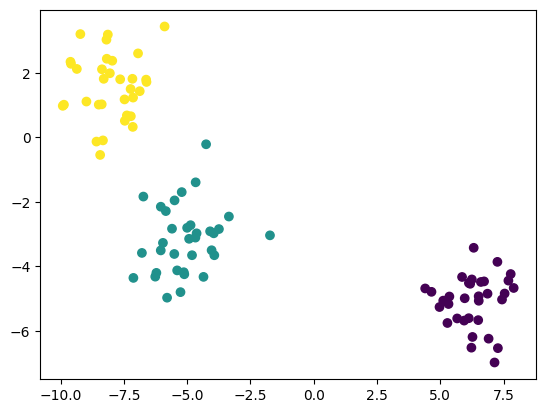

In [15]:
cluster_assignments = k_means(X,k=3,max_iter=100,n_init=10)
plt.scatter(X[:,0],X[:,1],c=cluster_assignments);

FCM

In [5]:
D = np.array([
    [1,2,3],
    [4,5,6]
])

D1 = D[:,None,:]

D2 = D[None,:,:]

D1/D2

array([[[1.  , 1.  , 1.  ],
        [0.25, 0.4 , 0.5 ]],

       [[4.  , 2.5 , 2.  ],
        [1.  , 1.  , 1.  ]]])

In [ ]:
2,1,3 / 1,2,3 -> 2,2,3

In [6]:
D/D

array([[1., 1., 1.],
       [1., 1., 1.]])

## Fuzzy C-Means Clustering Algorithm

In [ ]:
...

## Possibilistic C-Means Clustering Algorithm

In [2]:
import sys  
sys.path.insert(1, '/home/wouter/Projects/Clustering')

from fuzzy_c_means import FCM

initialize parameters

In [ ]:
nr_clusters = ...
m = 2 # fuzzifier
iteration_counter = 1

Initialize possibilistic c-partition $\mathbf{U}^{(o)}$

In [ ]:
# e.g. using FCM
FCM()